In [57]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from datetime import timedelta

from IPython.display import display, Markdown, Latex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('notebook')

from glob import glob
from os import path
import os
from multiprocessing import Pool

import vg

from collections import defaultdict, namedtuple

import sqlite3

import sys
sys.path.insert(1, '../src/')
from mythicwind.gps import *
from mythicwind.csv_io import *
from mythicwind.ellipse import *
from mythicwind.tools import printMD, printTeX

data_dir = '../data'
turbine_data_dir = '../data/turbines/'
results_dir = '../results'

# selected_turbines = [f'turbine-{i:02d}' for i in range(4, 17)]
selected_turbines = [f'turbine-{i:02d}' for i in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hammerheads, TNHB1 amd TNHB2

In [162]:
turbines_geometry = dict()

for turbine_name in selected_turbines:
    for state in ('hammerhead', 'tnhb1', 'tnhb2'):
        datafile = glob(f'../data/turbines/{turbine_name}/helihoist-1/tom/acc-vel-pos/{state}/{turbine_name}_helihoist-1_tom_acc-vel-pos_{state}_*_*.csv')
        if not datafile:
            continue
        datafile=datafile[0] # glob always returns a list
        
        start_end = '_'.join(datafile.split('_')[5:7])

        target_dir = f'../data/turbines/{turbine_name}/helihoist-1/tom/geometry/{state}'
        
        if not path.isdir(target_dir):
            os.mkdir(target_dir)
            
        target_file = path.join(target_dir, f'{turbine_name}_helihoist-1_tom_geometry_{state}_{start_end}')
        print(target_file)
        data = read_frame(datafile)
        geometry = geometry_analysis(data)
        write_frame(geometry, target_file)
        #turbines_geometry[turbine_name].axis_ratio.mask(turbines_geometry[turbine_name] > 1, inplace=True)
    

../data/turbines/turbine-04/helihoist-1/tom/geometry/hammerhead/turbine-04_helihoist-1_tom_geometry_hammerhead_2019-09-01-10-20-45_2019-09-07-07-19-26.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-04/helihoist-1/tom/geometry/tnhb1/turbine-04_helihoist-1_tom_geometry_tnhb1_2019-09-07-12-40-14_2019-09-07-21-49-58.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-05/helihoist-1/tom/geometry/hammerhead/turbine-05_helihoist-1_tom_geometry_hammerhead_2019-09-10-16-04-47_2019-09-20-02-53-43.csv
../data/turbines/turbine-05/helihoist-1/tom/geometry/tnhb1/turbine-05_helihoist-1_tom_geometry_tnhb1_2019-09-20-07-42-54_2019-09-20-12-01-11.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-05/helihoist-1/tom/geometry/tnhb2/turbine-05_helihoist-1_tom_geometry_tnhb2_2019-09-20-12-51-37_2019-09-20-16-14-47.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-06/helihoist-1/tom/geometry/hammerhead/turbine-06_helihoist-1_tom_geometry_hammerhead_2019-09-22-03-14-43_2019-09-22-12-05-47.csv
../data/turbines/turbine-06/helihoist-1/tom/geometry/tnhb1/turbine-06_helihoist-1_tom_geometry_tnhb1_2019-09-22-12-41-45_2019-09-22-22-11-22.csv
../data/turbines/turbine-06/helihoist-1/tom/geometry/tnhb2/turbine-06_helihoist-1_tom_geometry_tnhb2_2019-09-23-00-30-45_2019-09-23-00-42-54.csv
../data/turbines/turbine-07/helihoist-1/tom/geometry/hammerhead/turbine-07_helihoist-1_tom_geometry_hammerhead_2019-09-24-11-38-50_2019-09-25-12-01-27.csv
../data/turbines/turbine-07/helihoist-1/tom/geometry/tnhb1/turbine-07_helihoist-1_tom_geometry_tnhb1_2019-09-25-13-49-58_2019-09-25-18-30-35.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-07/helihoist-1/tom/geometry/tnhb2/turbine-07_helihoist-1_tom_geometry_tnhb2_2019-09-25-21-28-57_2019-09-26-01-04-54.csv
../data/turbines/turbine-08/helihoist-1/tom/geometry/hammerhead/turbine-08_helihoist-1_tom_geometry_hammerhead_2019-10-14-07-55-52_2019-10-15-06-10-33.csv
../data/turbines/turbine-08/helihoist-1/tom/geometry/tnhb1/turbine-08_helihoist-1_tom_geometry_tnhb1_2019-10-15-07-30-26_2019-10-15-14-21-36.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-08/helihoist-1/tom/geometry/tnhb2/turbine-08_helihoist-1_tom_geometry_tnhb2_2019-10-15-15-13-04_2019-10-15-22-19-59.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-09/helihoist-1/tom/geometry/hammerhead/turbine-09_helihoist-1_tom_geometry_hammerhead_2019-10-04-12-59-44_2019-10-08-01-41-05.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-10/helihoist-1/tom/geometry/hammerhead/turbine-10_helihoist-1_tom_geometry_hammerhead_2019-10-23-11-32-59_2019-10-23-19-42-22.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-11/helihoist-1/tom/geometry/hammerhead/turbine-11_helihoist-1_tom_geometry_hammerhead_2019-10-31-04-18-02_2019-10-31-10-41-13.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-11/helihoist-1/tom/geometry/tnhb1/turbine-11_helihoist-1_tom_geometry_tnhb1_2019-10-31-12-54-16_2019-10-31-15-30-44.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-11/helihoist-1/tom/geometry/tnhb2/turbine-11_helihoist-1_tom_geometry_tnhb2_2019-10-31-18-52-53_2019-11-03-20-05-36.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-12/helihoist-1/tom/geometry/hammerhead/turbine-12_helihoist-1_tom_geometry_hammerhead_2019-11-04-23-16-25_2019-11-05-04-33-05.csv
../data/turbines/turbine-12/helihoist-1/tom/geometry/tnhb1/turbine-12_helihoist-1_tom_geometry_tnhb1_2019-11-05-06-55-15_2019-11-07-01-33-43.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-12/helihoist-1/tom/geometry/tnhb2/turbine-12_helihoist-1_tom_geometry_tnhb2_2019-11-07-01-33-43_2019-11-07-10-44-21.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-13/helihoist-1/tom/geometry/hammerhead/turbine-13_helihoist-1_tom_geometry_hammerhead_2019-11-09-12-22-51_2019-11-10-12-59-19.csv
../data/turbines/turbine-13/helihoist-1/tom/geometry/tnhb1/turbine-13_helihoist-1_tom_geometry_tnhb1_2019-11-10-13-33-08_2019-11-16-05-29-59.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-13/helihoist-1/tom/geometry/tnhb2/turbine-13_helihoist-1_tom_geometry_tnhb2_2019-11-16-06-41-20_2019-11-17-14-30-41.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-14/helihoist-1/tom/geometry/hammerhead/turbine-14_helihoist-1_tom_geometry_hammerhead_2019-11-24-16-42-08_2019-11-24-21-16-51.csv
../data/turbines/turbine-14/helihoist-1/tom/geometry/tnhb1/turbine-14_helihoist-1_tom_geometry_tnhb1_2019-11-25-04-59-18_2019-11-25-08-27-01.csv
../data/turbines/turbine-14/helihoist-1/tom/geometry/tnhb2/turbine-14_helihoist-1_tom_geometry_tnhb2_2019-11-25-11-17-00_2019-11-25-14-13-54.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-16/helihoist-1/tom/geometry/hammerhead/turbine-16_helihoist-1_tom_geometry_hammerhead_2019-12-03-22-07-33_2019-12-17-03-56-11.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


../data/turbines/turbine-16/helihoist-1/tom/geometry/tnhb1/turbine-16_helihoist-1_tom_geometry_tnhb1_2019-12-17-04-22-54_2019-12-22-06-09-32.csv
../data/turbines/turbine-16/helihoist-1/tom/geometry/tnhb2/turbine-16_helihoist-1_tom_geometry_tnhb2_2019-12-22-18-47-36_2019-12-24-11-39-04.csv


../src/mythicwind/ellipse.py:134: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(


<IPython.core.display.Javascript object>


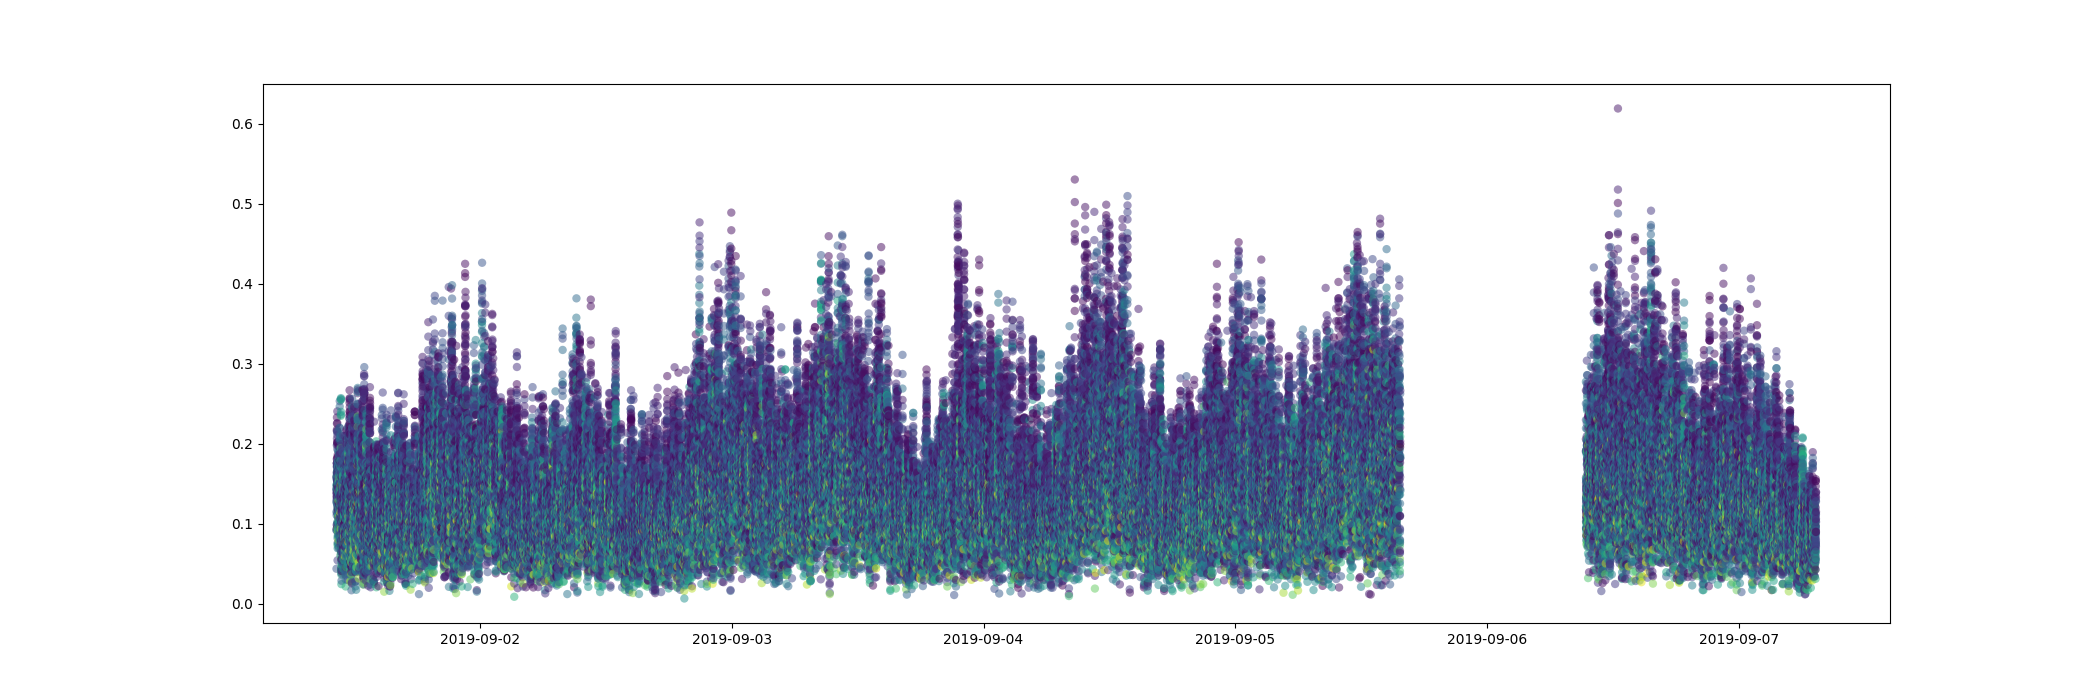

In [151]:
plt.figure()
#plt.plot(geometry.max_deflection)
plt.scatter(geometry.index, geometry.max_deflection, c=geometry.axis_ratio, alpha=0.5, edgecolor='None')

<IPython.core.display.Javascript object>


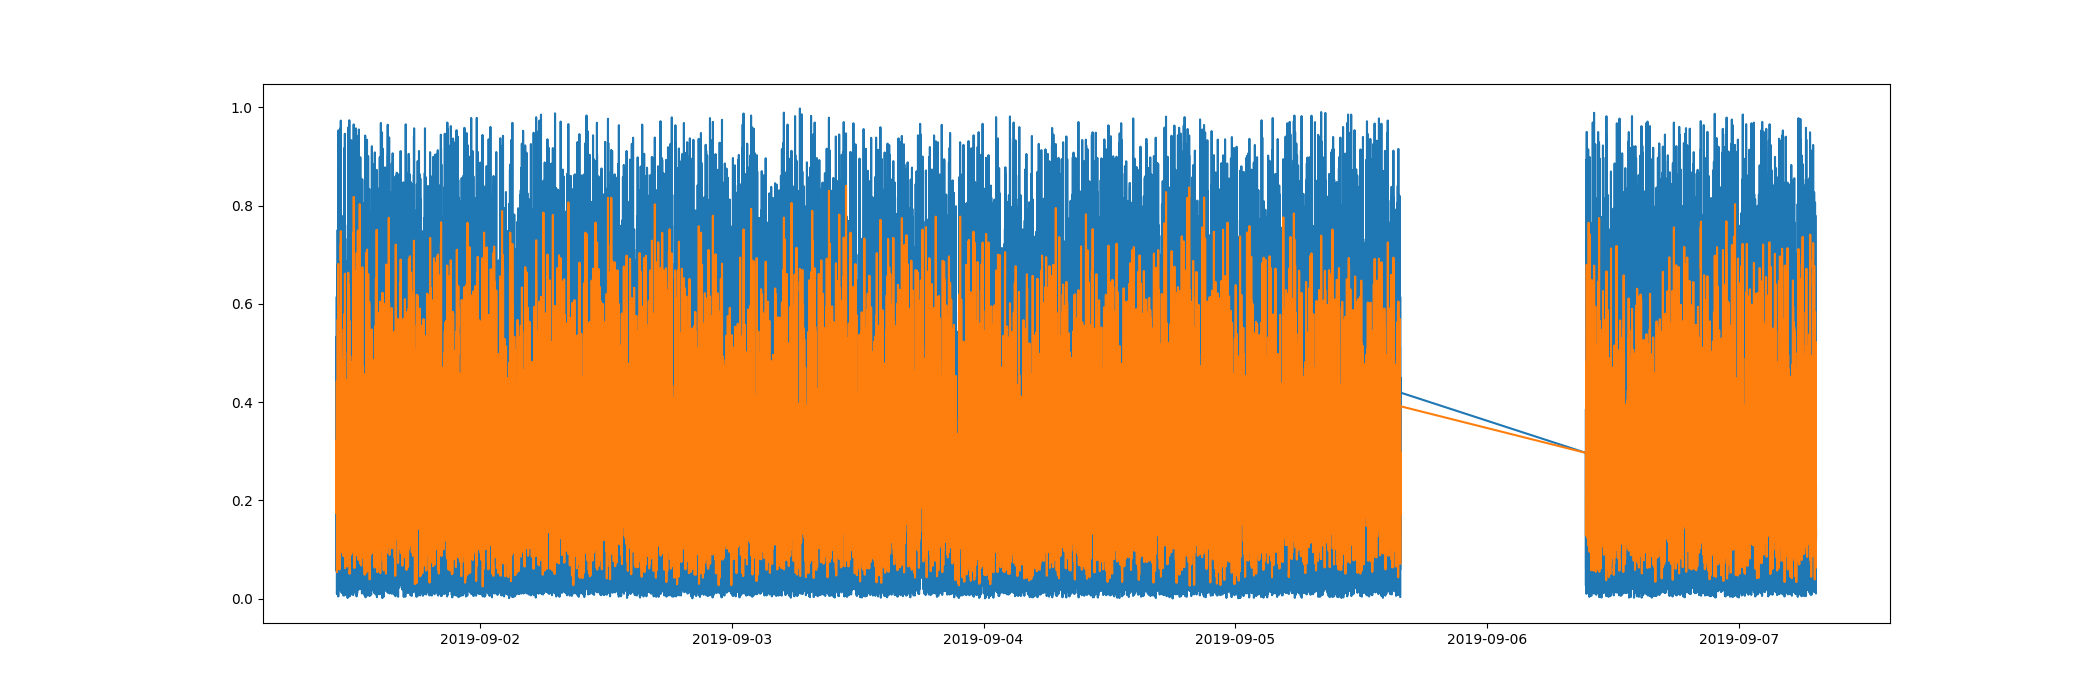

In [91]:
plt.figure()
plt.plot(geometry.axis_ratio)
plt.plot(geometry.axis_ratio.rolling('30s').mean())

<IPython.core.display.Javascript object>


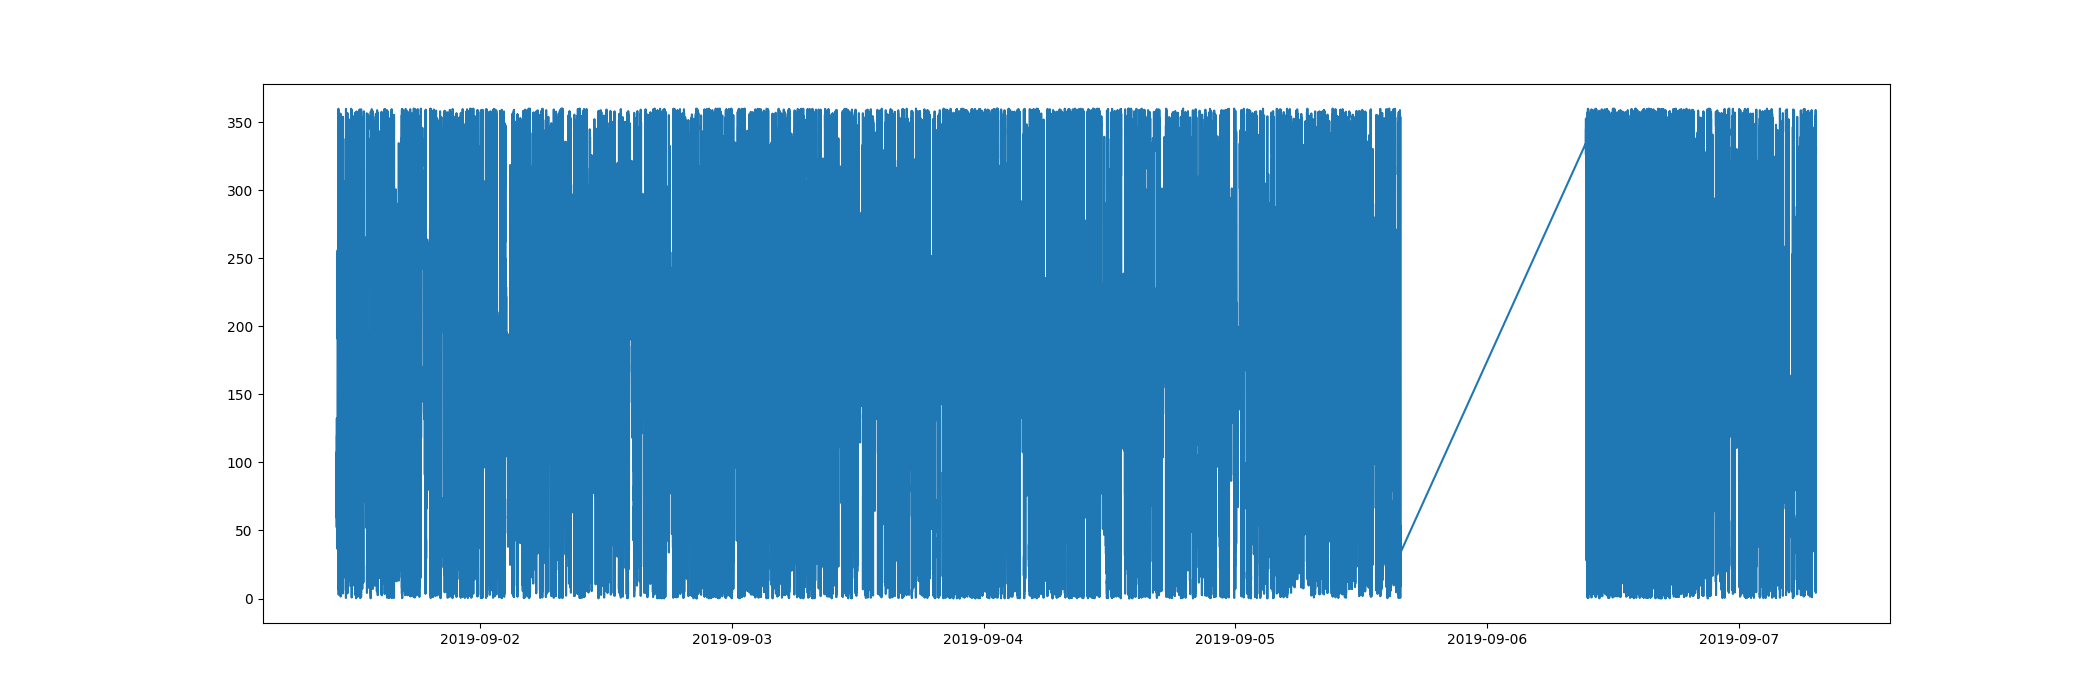

In [68]:
plt.figure()
plt.plot(geometry.p2p_azimuth)

<IPython.core.display.Javascript object>


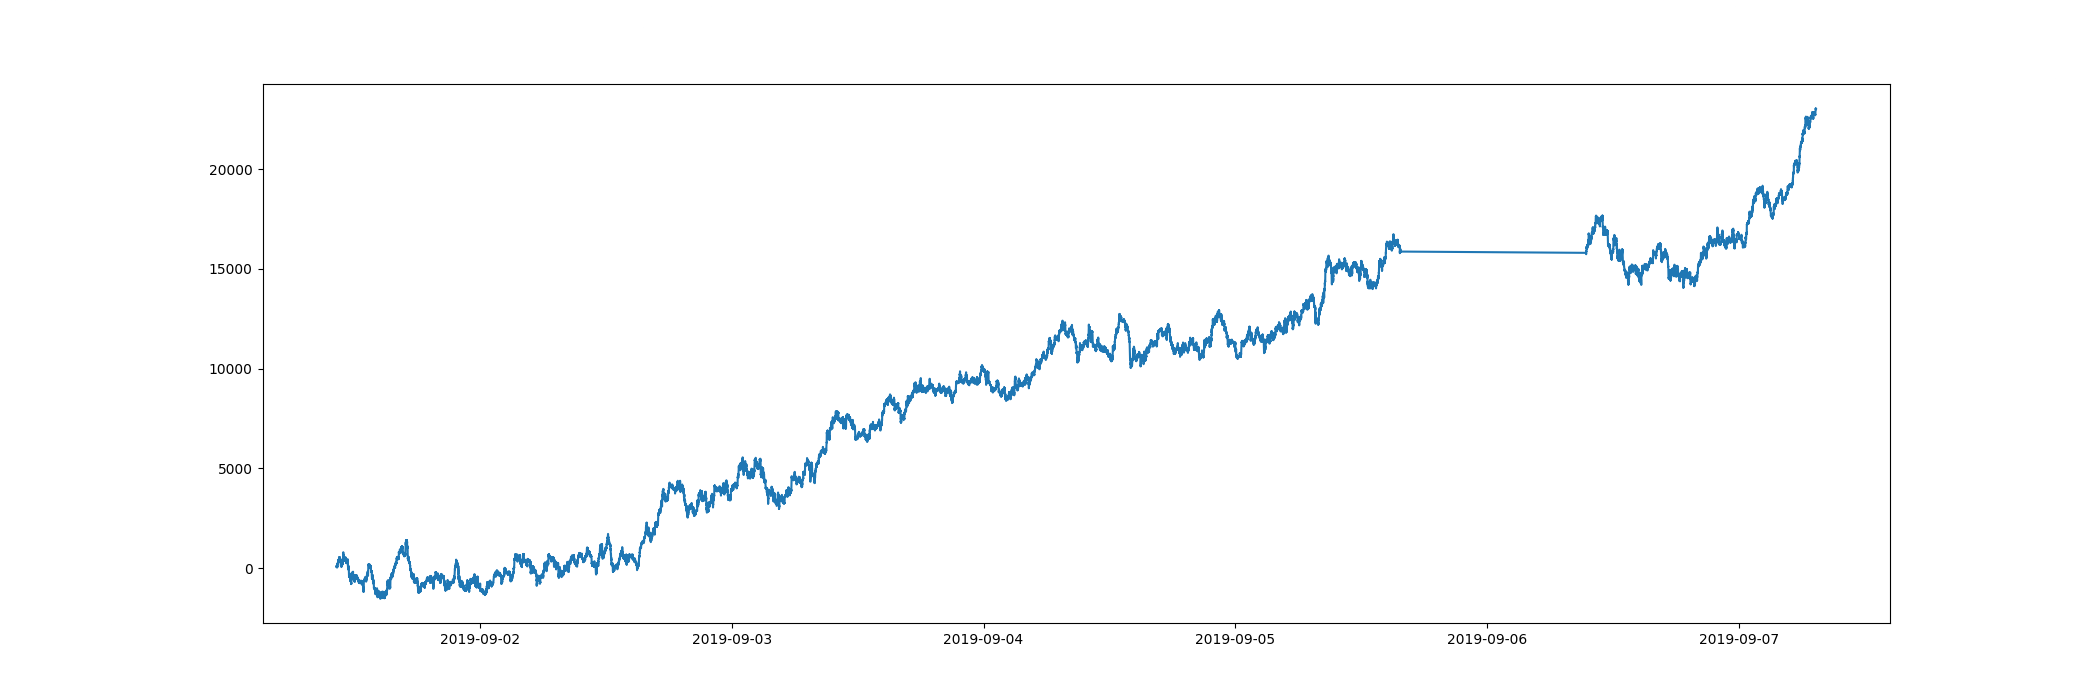

In [69]:
plt.figure()
plt.plot(geometry.p2p_azimuth_unwrapped)

<IPython.core.display.Javascript object>


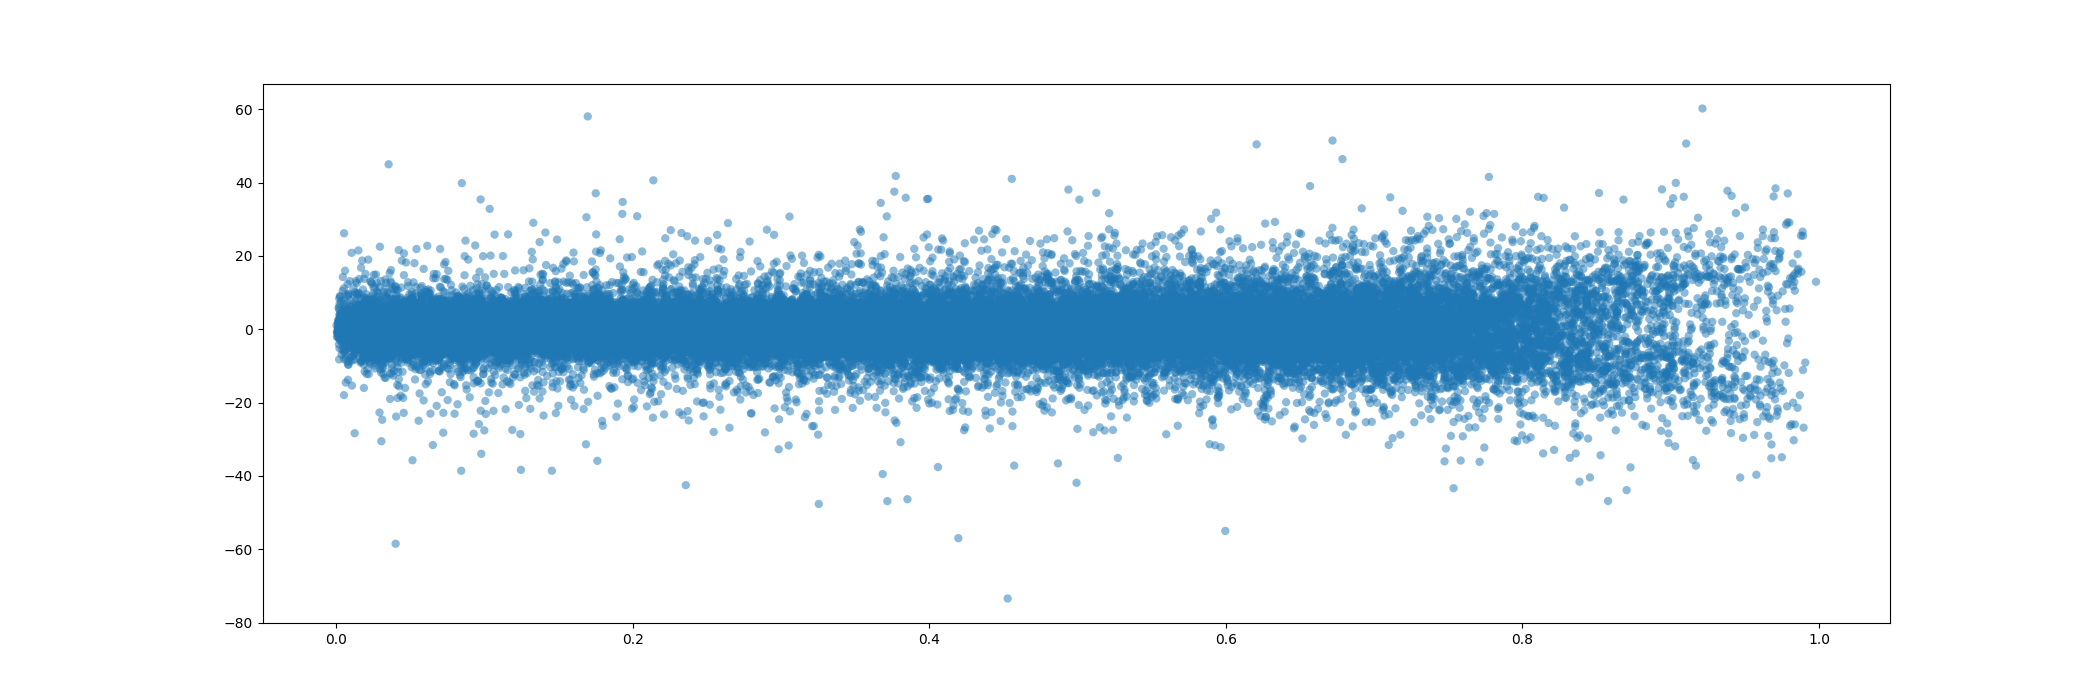

In [90]:
fig = plt.figure()
sc = plt.scatter(geometry.axis_ratio.abs(), geometry.ddt_p2p_azimuth_unwrapped, alpha=0.5, edgecolor='None')


<IPython.core.display.Javascript object>


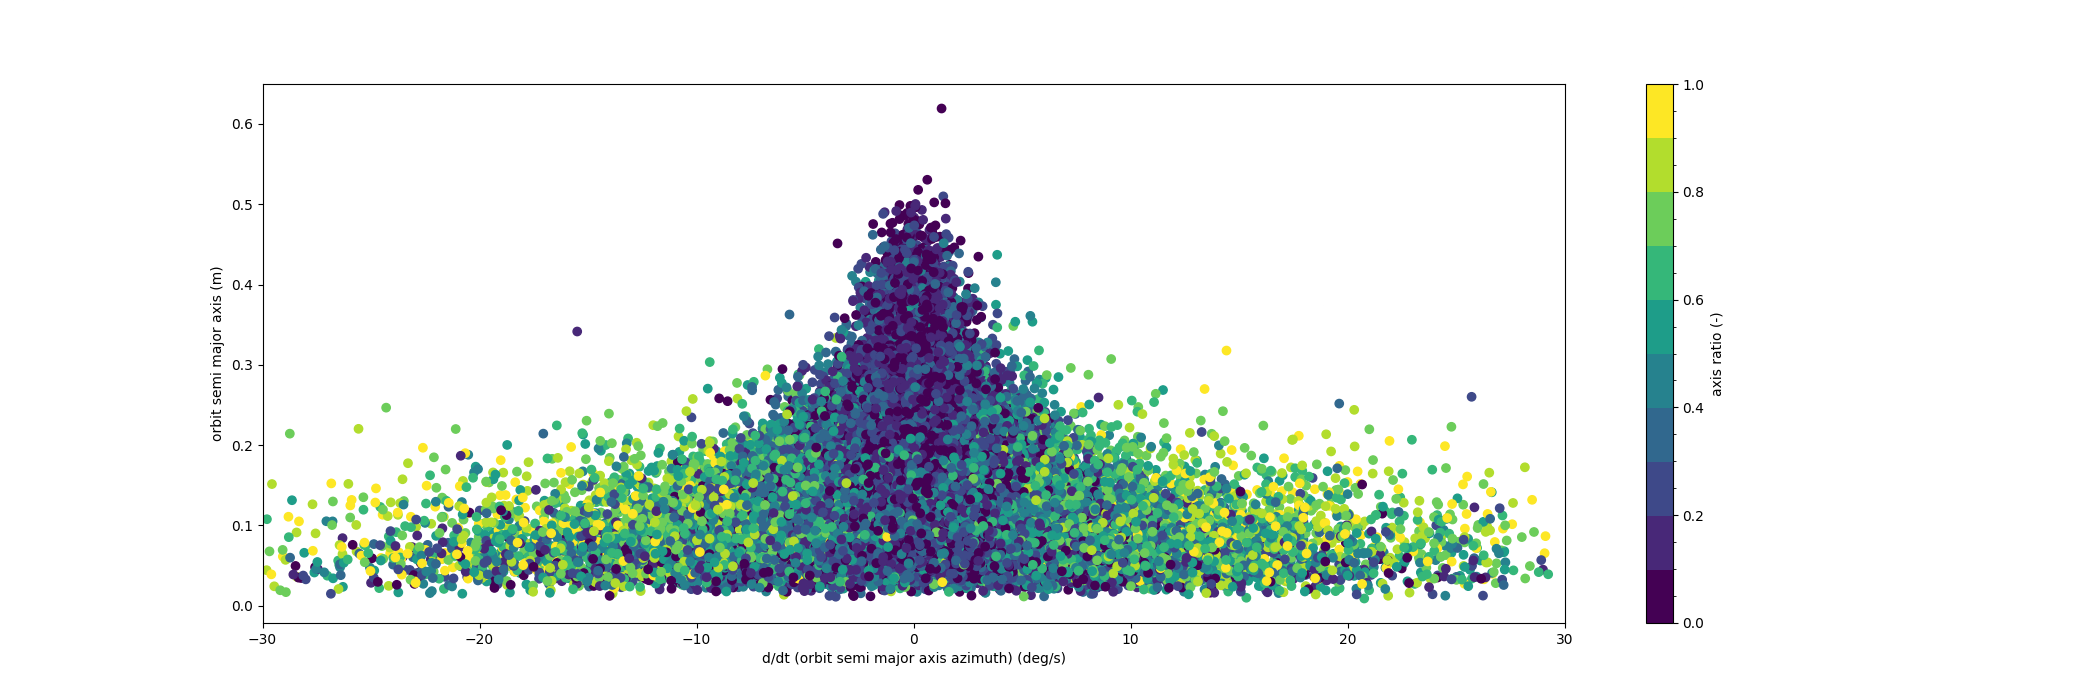

(-30.0, 30.0)

In [147]:
cmap = plt.cm.viridis  # define the colormap
bounds = np.linspace(0, 1, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig = plt.figure()

sc = plt.scatter(geometry.ddt_p2p_azimuth_unwrapped, 
                 geometry.max_deflection, 
                 c=geometry.axis_ratio,
                 cmap=cmap,
                 norm=norm,
                 #alpha=0.2,
                 #edgecolor='white',
                )

plt.xlabel("d/dt (orbit semi major axis azimuth) (deg/s)")
plt.ylabel("orbit semi major axis (m)")

cbar = fig.colorbar(sc)
cbar.set_label('axis ratio (-)')
cbar.minorticks_on()
plt.xlim([-30, 30])

<IPython.core.display.Javascript object>


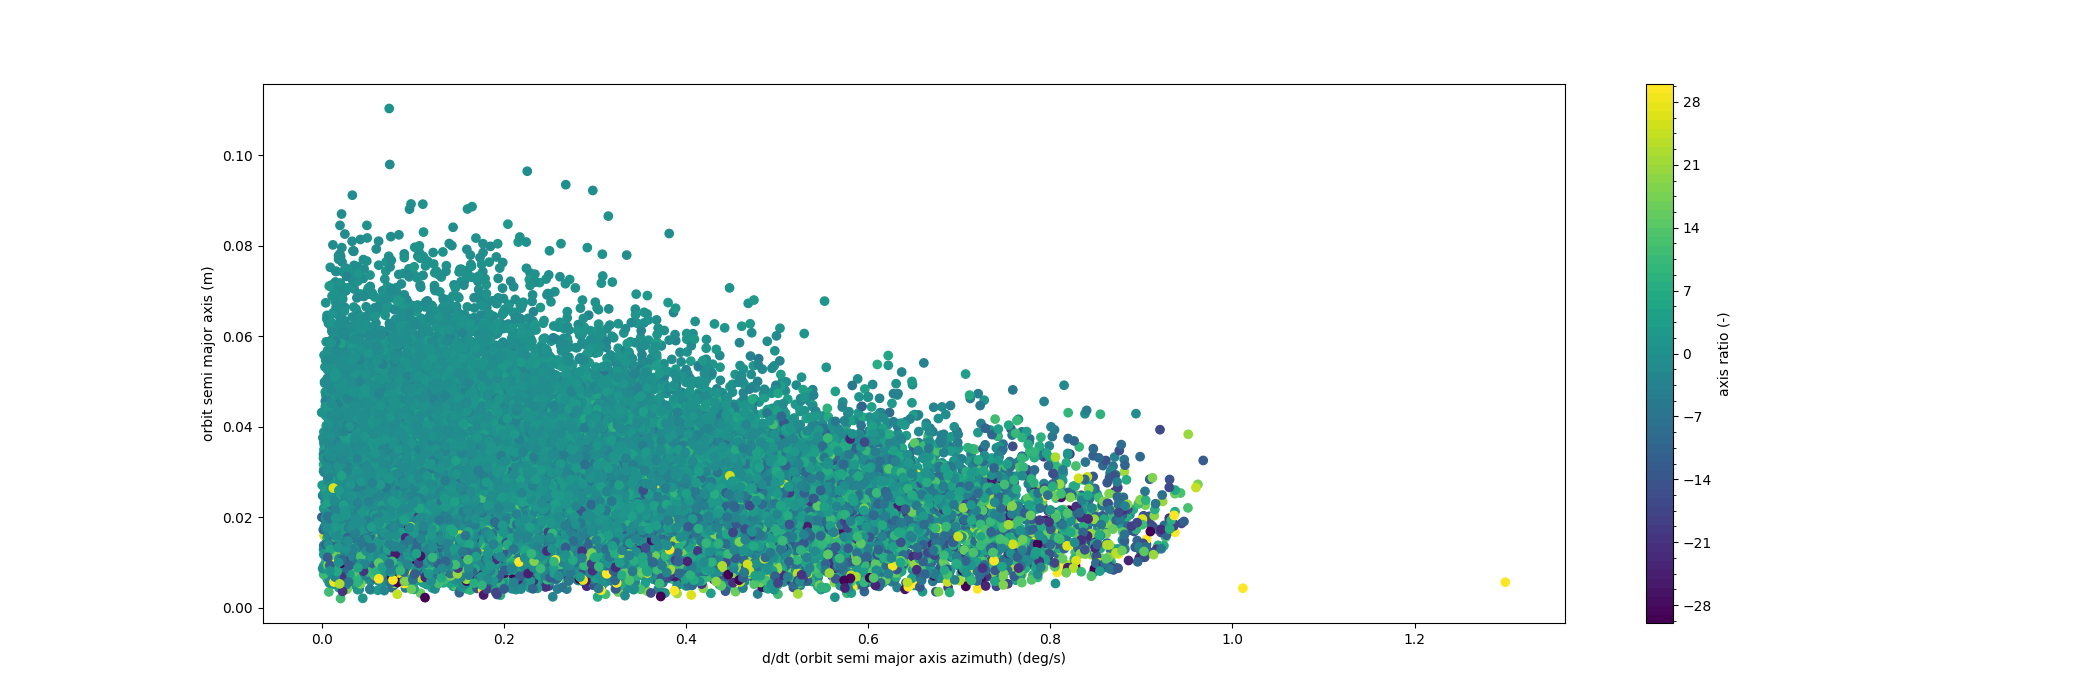

In [165]:
cmap = plt.cm.viridis  # define the colormap
bounds = np.linspace(-30, 30, 61)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig = plt.figure()

sc = plt.scatter(geometry.axis_ratio, 
                 geometry.max_deflection, 
                 c=geometry.ddt_p2p_azimuth_unwrapped,
                 cmap=cmap,
                 norm=norm,
                 #alpha=0.2,
                 #edgecolor='white',
                )

plt.xlabel("d/dt (orbit semi major axis azimuth) (deg/s)")
plt.ylabel("orbit semi major axis (m)")

cbar = fig.colorbar(sc)
cbar.set_label('axis ratio (-)')
cbar.minorticks_on()
#plt.xlim([-30, 30])

In [ ]:
turbines_geometry = dict()

for turbine_name in selected_turbines:
    datafile = glob(f'../data/turbines/{turbine_name}/helihoist-1/tom/acc-vel-pos/hammerhead/{turbine_name}_helihoist-1_tom_acc-vel-pos_hammerhead_*_*.csv')[0]
    data = read_frame(datafile)
    turbines_geometry[turbine_name] = geometry_analysis(data)
    turbines_geometry[turbine_name].axis_ratio.mask(turbines_geometry[turbine_name] > 1, inplace=True)
    
    